# Finance Analytics

## Imports and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/tmp/ipykernel_24420/3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
finance_df = pd.read_csv('../data/expenses.csv')
finance_df.head()

,DATA,VALOR,CATEGORIA,DESCRIÇÃO,PAGAMENTO
0,20/03/2024,R$ 11.71,transporte,transporte descricao,débito
1,24/05/2024,R$ 72.58,outros,outros descricao,crédito
2,09/01/2024,R$ 82.65,outros,outros descricao,débito
3,26/04/2024,R$ 68.34,lazer,lazer descricao,crédito
4,06/09/2024,R$ 43.46,serviços,serviços descricao,débito


In [3]:
# transform date column to datetime and create month and year columns
finance_df['DATA'] = pd.to_datetime(finance_df['DATA'], format='%d/%m/%Y')
finance_df['MES'] = finance_df['DATA'].dt.month
finance_df['ANO'] = finance_df['DATA'].dt.year
finance_df.sample(5)

,DATA,VALOR,CATEGORIA,DESCRIÇÃO,PAGAMENTO,MES,ANO
15,2024-09-24,R$ 31.71,transporte,transporte descricao,débito,9,2024
4,2024-09-06,R$ 43.46,serviços,serviços descricao,débito,9,2024
38,2024-01-20,R$ 71.41,outros,outros descricao,crédito,1,2024
72,2024-02-22,R$ 49.07,alimentação,alimentação descricao,débito,2,2024
51,2024-09-05,R$ 65.11,saúde,saúde descricao,crédito,9,2024


In [4]:
expenses_df = finance_df
expenses_df['VALOR'] = finance_df['VALOR'].str.replace('[R\$,]', '', regex=True).astype(float)

## General Data Exploration

### Expenses by Category

In [5]:
expenses_df = finance_df.groupby(['CATEGORIA', 'ANO', 'MES']).sum(numeric_only=True)
expenses_df.reset_index(inplace=True)
expenses_df.sort_values(by='VALOR', ascending=False, inplace=True)
expenses_df

,CATEGORIA,ANO,MES,VALOR
17,outros,2024,1,374.70
13,lazer,2024,6,349.73
26,saúde,2024,4,335.52
35,serviços,2024,4,248.91
49,transporte,2024,11,203.28
16,lazer,2024,12,162.94
23,saúde,2024,1,156.76
32,saúde,2024,11,155.44
12,lazer,2024,5,154.49
2,alimentação,2024,5,150.93


In [6]:
def filter_expenses_by_month(month):
    return expenses_df[expenses_df['MES'] == month]

In [7]:
def filter_expenses_by_category(category):
    return expenses_df[expenses_df['CATEGORIA'] == category]

In [8]:
def plot_expenses_by_category(df, month=None):
    """Plot expenses by category."""
    plt.figure(figsize=(12, 8))
    sns.set_style("darkgrid")
    plt.plot()

    ax = sns.barplot(df,
                    x='VALOR',
                    y='CATEGORIA',
                    errorbar=None,
                    )
    ax.bar_label(ax.containers[0])
    ax.set_title('Despesas por Categoria para ' + month)
    ax.set_xlabel('Valor em R$')
    ax.set_ylabel('Categoria')
    plt.show()

In [9]:
def plot_expenses_by_category_and_month(df):
    """Plot expenses by category and month."""
    plt.figure(figsize=(12, 8))
    sns.set_style("darkgrid")
    plt.plot()

    ax = sns.lineplot(data=df,
                        x='MES',
                        y='VALOR',
                        hue='CATEGORIA',
                        style='CATEGORIA',
                        markers=True,
                        dashes=False,
                        palette='tab10',
                        linewidth=2.5,
                        alpha=0.9,
                        )
    ax.set_title('Despesas por Categoria')
    ax.set_xlabel('Mês')
    ax.set_ylabel('Valor em R$')
    plt.show()

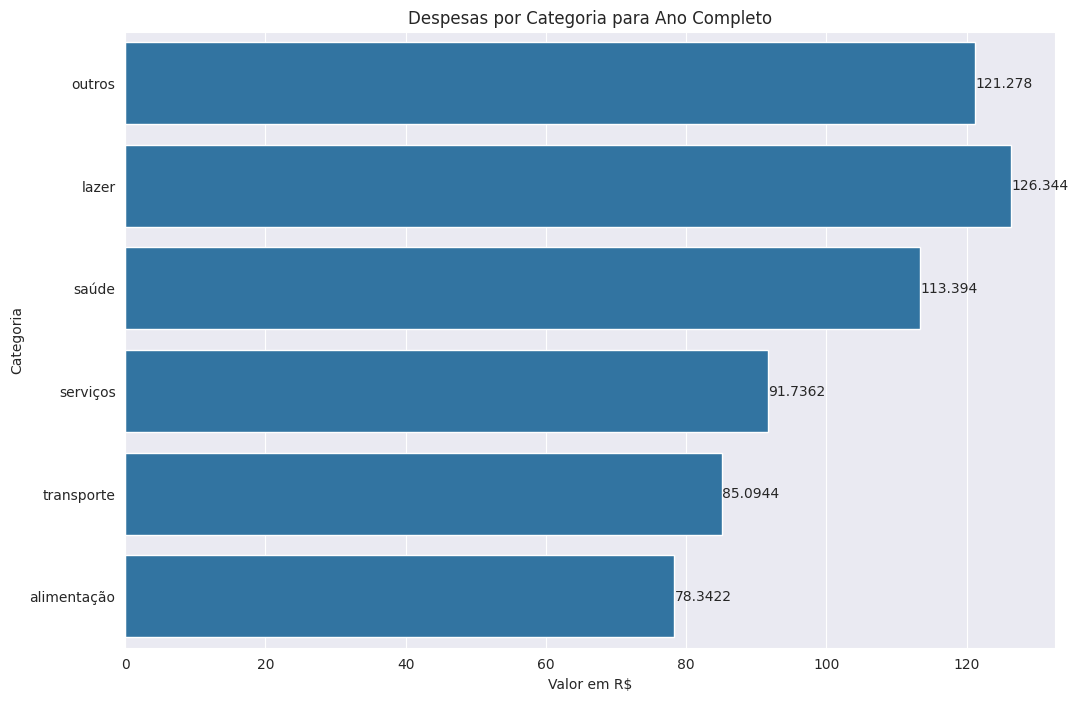

In [10]:
plot_expenses_by_category(expenses_df, 'Ano Completo')

### Payment Method

In [11]:
payment_df = finance_df.groupby('PAGAMENTO').sum(numeric_only = True)
payment_df.reset_index(inplace=True)
payment_df

,PAGAMENTO,VALOR,MES,ANO
0,crédito,2518.68,266,93104
1,débito,2558.50,298,109296


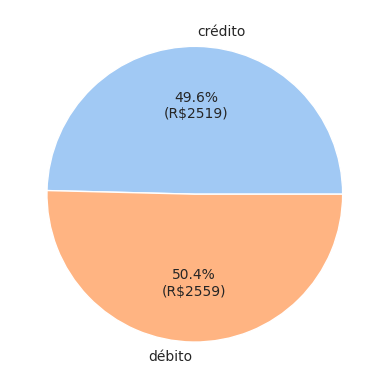

In [12]:
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{:.1f}%\n(R${v:d})'.format(pct, v=val)
  return my_format

colors = sns.color_palette('pastel')
plt.pie(payment_df['VALOR'],
        labels=payment_df['PAGAMENTO'],
        colors=colors, autopct=autopct_format(payment_df['VALOR']))
plt.show()

## Monthly Data Exploration

### Expenses by Month for each Category

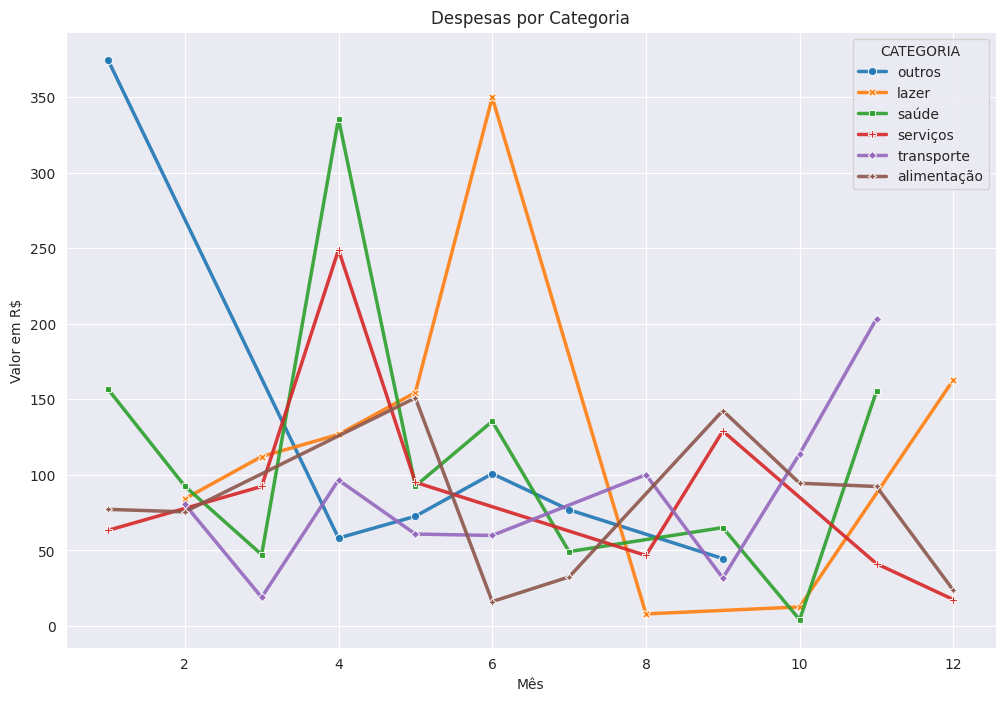

In [13]:
# line plot for each category by month
plot_expenses_by_category_and_month(expenses_df)

### Expenses by Category for First Month

In [14]:
# expenses by category for the first month
first_month_df = filter_expenses_by_month(1)
first_month_df

,CATEGORIA,ANO,MES,VALOR
17,outros,2024,1,374.70
23,saúde,2024,1,156.76
0,alimentação,2024,1,77.17
33,serviços,2024,1,63.25


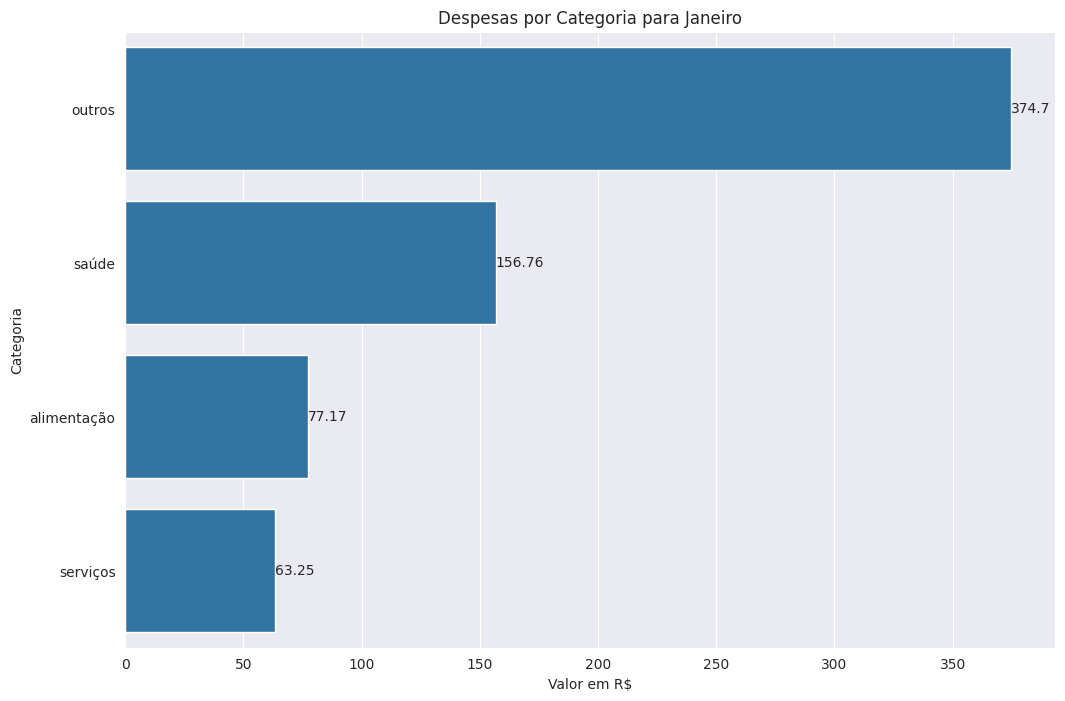

In [15]:
plot_expenses_by_category(first_month_df, 'Janeiro')

In [16]:
category_expenses_df = filter_expenses_by_category('alimentação')
category_expenses_df

,CATEGORIA,ANO,MES,VALOR
2,alimentação,2024,5,150.93
5,alimentação,2024,9,142.51
6,alimentação,2024,10,94.46
7,alimentação,2024,11,92.30
0,alimentação,2024,1,77.17
1,alimentação,2024,2,75.52
4,alimentação,2024,7,32.45
8,alimentação,2024,12,23.59
3,alimentação,2024,6,16.15


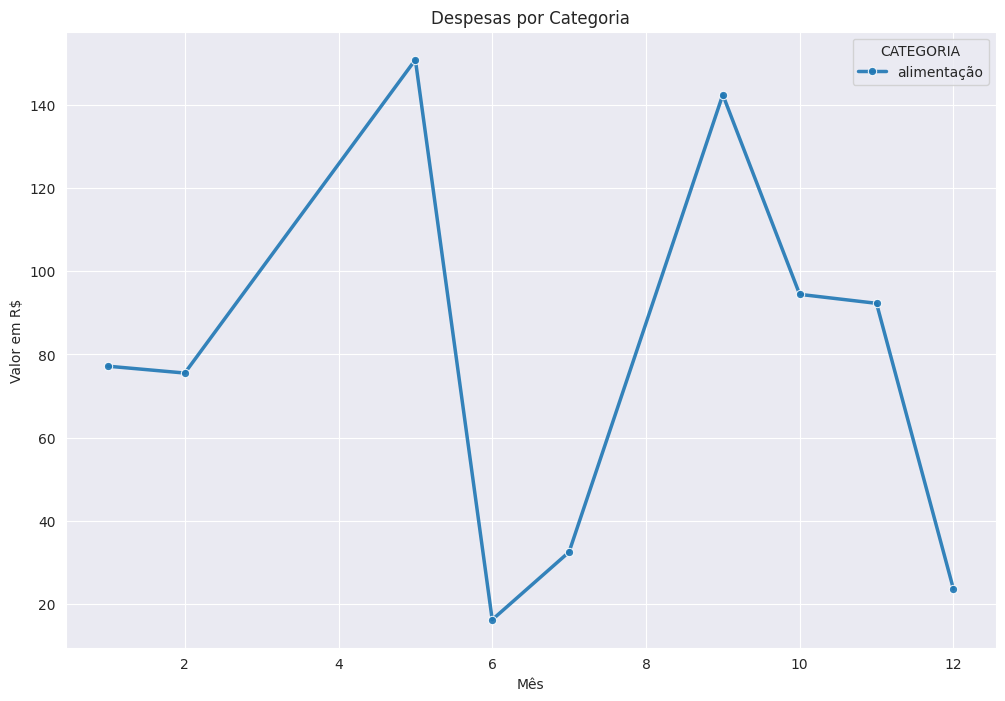

In [17]:
plot_expenses_by_category_and_month(category_expenses_df)